In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [3]:
def draw_mean(df_beta, df_amise, save_file=None):
    fig = plt.figure(figsize=(5, 4))
    #for i, method in enumerate(df_beta["method"].unique()):
    #    plt.scatter(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_ic_low"], marker="_", color=f"C7")
    #    plt.scatter(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_ic_up"], marker="_", color=f"C7")
    #    plt.fill_between(df_beta["nb_samples"].unique(), df_beta[df_beta["method"]==method]["pf_ic_low"], df_beta[df_beta["method"]==method]["pf_ic_up"] , color=f"C3", alpha=0.2)
    #    plt.plot(df_beta["nb_samples"].unique(), df_beta[df_beta["method"]==method]["pf_mean"], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS":
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.fill_between(df_amise[df_amise["method"]==method]["nb_samples"], df_amise[df_amise["method"]==method]["pf_mean"], df_amise[df_amise["method"]==method]["pf_ic_up"], color=f"C{i}", alpha=0.2)
        plt.plot(df_amise[df_amise["method"]==method]["nb_samples"], df_amise[df_amise["method"]==method]["pf_mean"], label=label, marker="d", color=f"C{i}")
    #plt.axhline(df_amise["pf_ref"].unique(), color="k", zorder=0, label="Reference $p_\mathrm{f}$")
    plt.axhline(df_amise["pf_ref"].unique(), color="k", zorder=0)

    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    #plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    plt.ylabel("Mean($\hat{p_\mathrm{f}}$)")
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

def draw_stat(df_beta, df_amise, stat="pf_std", save_file=None):
    fig = plt.figure(figsize=(5, 4))
    #for i, method in enumerate(df_beta["method"].unique()):
    #    plt.plot(df_beta["nb_samples"].unique(), df_beta[df_beta["method"]==method][stat], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS": 
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.plot(df_amise[df_amise["method"]==method]["nb_samples"], df_amise[df_amise["method"]==method][stat], label=label, marker="d", color=f"C{i}")
    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    #plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    if stat == "pf_std":
        plt.ylabel("Standard deviation($\hat{p_\mathrm{f}}$)")
    elif stat == "pf_med":
        plt.ylabel("Median($\hat{p_\mathrm{f}}$)")
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

def draw_cov(df_beta, df_amise, save_file=None):
    fig = plt.figure(figsize=(5, 4))
    #for i, method in enumerate(df_beta["method"].unique()):
    #    plt.plot(df_beta["nb_samples"].unique(), df_beta[df_beta["method"]==method]["pf_std"] / df_beta[df_beta["method"]==method]["pf_ref"], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS": 
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.plot(df_amise[df_amise["method"]==method]["nb_samples"], df_amise[df_amise["method"]==method]["pf_std"] / df_amise[df_amise["method"]==method]["pf_ref"], label=label, marker="d", color=f"C{i}")
    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    #plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    plt.ylabel("Coefficient of variation($\hat{p_\mathrm{f}}$)")
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

## Parabolic problem

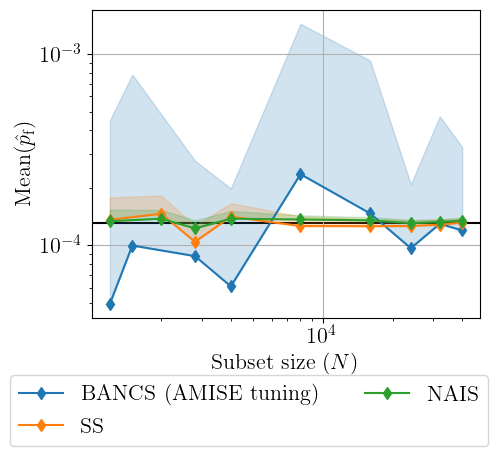

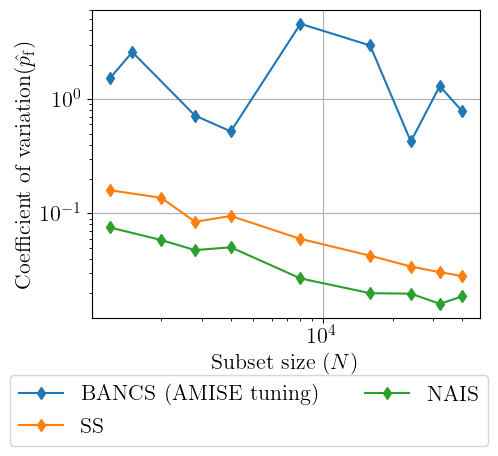

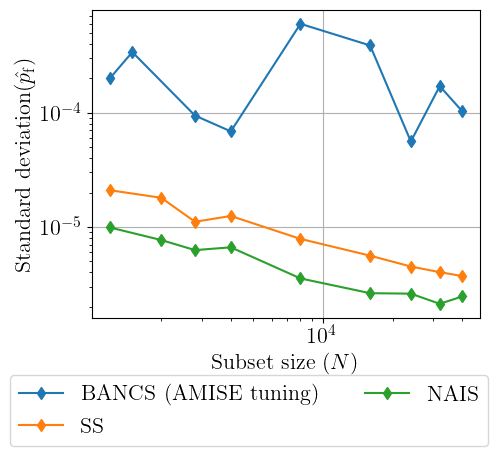

In [4]:
df_beta = pd.read_csv("results/Parabolic_results_beta.csv")
df_amise = pd.read_csv("results/Parabolic_results_amise.csv")

draw_mean(df_beta, df_amise, save_file="figures/Parabolic_mean.pdf");
draw_cov(df_beta, df_amise, save_file="figures/Parabolic_cov.pdf");
draw_stat(df_beta, df_amise, save_file="figures/Parabolic_std.pdf");

In [5]:
df_amise

,problem,method,size,nb_samples,pf_mean,pf_ref,pf_std,pf_ic_low,pf_ic_up,pfs
0,Parabolic,BANCS,300,1200,0.000049,0.000132,0.000200,-0.000351,0.000450,[4.944376446829655e-05]
1,Parabolic,BANCS,500,1500,0.000100,0.000132,0.000340,-0.000580,0.000780,[9.973679089258586e-05]
2,Parabolic,BANCS,700,2800,0.000088,0.000132,0.000094,-0.000101,0.000277,[8.777822093612077e-05]
3,Parabolic,BANCS,1000,4000,0.000061,0.000132,0.000069,-0.000076,0.000198,[6.0980560129187426e-05]
4,Parabolic,BANCS,2000,8000,0.000235,0.000132,0.000602,-0.000968,0.001438,[0.00023541949528530515]
5,Parabolic,BANCS,4000,16000,0.000147,0.000132,0.000389,-0.000630,0.000924,[0.0001467753691250583]
6,Parabolic,BANCS,6000,24000,0.000097,0.000132,0.000056,-0.000015,0.000209,[9.655762927851926e-05]
7,Parabolic,BANCS,8000,32000,0.000129,0.000132,0.000171,-0.000213,0.000472,[0.00012949638628690247]
8,Parabolic,BANCS,10000,40000,0.000120,0.000132,0.000103,-0.000087,0.000326,[0.00011964764643747451]
9,Parabolic,SS,300,1200,0.000136,0.000132,0.000021,0.000094,0.000178,[0.000136000000000001]


## Four Branch problem

In [6]:
#results20 = pd.read_csv("results/4B_results_m20.csv") 
#results40 = pd.read_csv("results/4B_results_m40.csv")
#results60 = pd.read_csv("results/4B_results_m60.csv")
#results100 = pd.read_csv("results/4B_results_m100.csv")

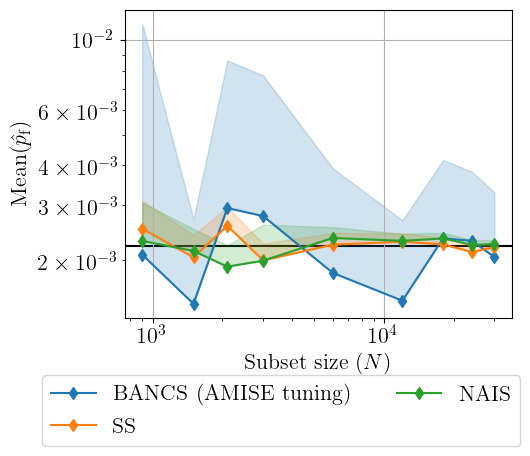

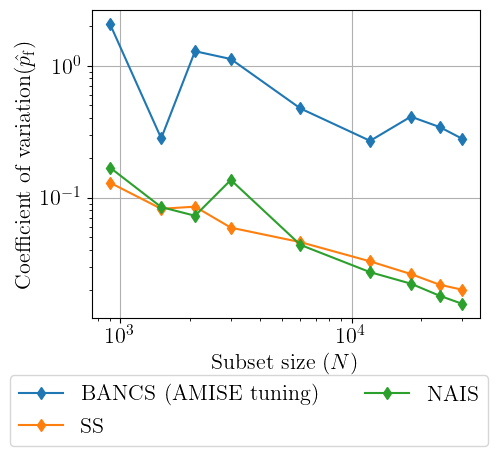

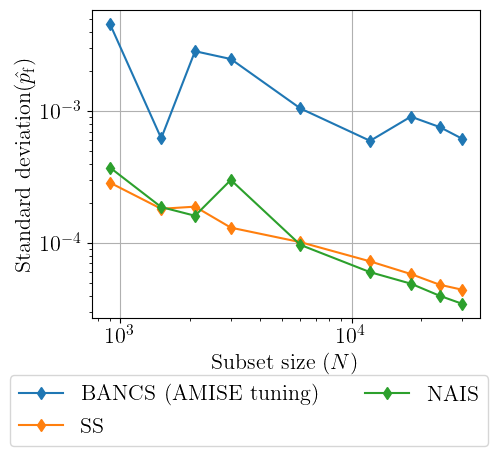

In [7]:
df_beta = pd.read_csv("results/RP4B_results_beta.csv")
df_amise = pd.read_csv("results/RP4B_results_amise.csv")

draw_mean(df_beta, df_amise, save_file="figures/RP4B_mean.pdf");
draw_cov(df_beta, df_amise, save_file="figures/RP4B_cov.pdf");
draw_stat(df_beta, df_amise, save_file="figures/RP4B_std.pdf");

## Reliability problem 57

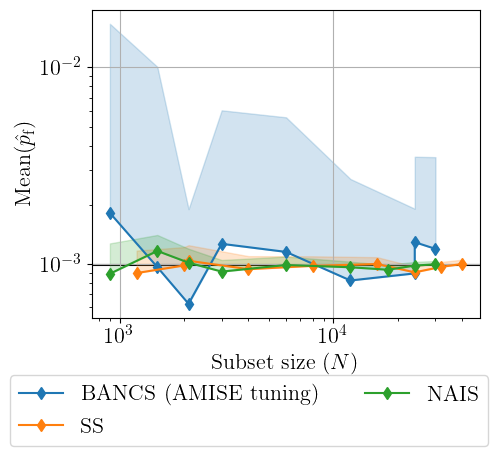

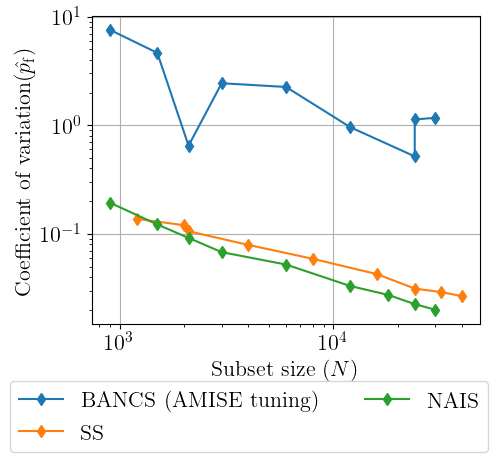

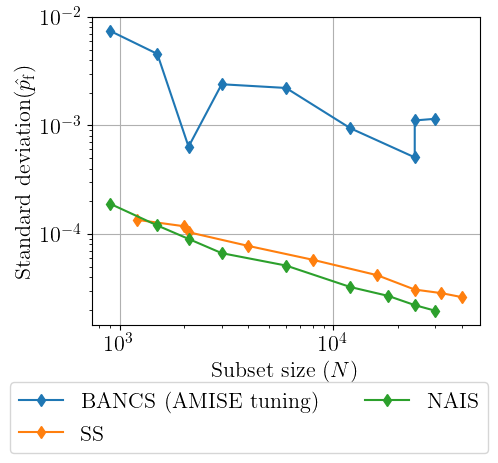

In [8]:
df_beta = pd.read_csv("results/RP57_results_beta.csv")
df_amise = pd.read_csv("results/RP57_results_amise.csv")

draw_mean(df_beta, df_amise, save_file="figures/RP57_mean.pdf");
draw_cov(df_beta, df_amise, save_file="figures/RP57_cov.pdf");
draw_stat(df_beta, df_amise, save_file="figures/RP57_std.pdf");

## Reliability problem 38

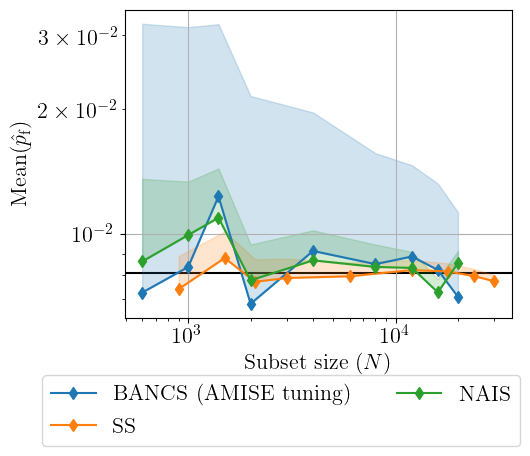

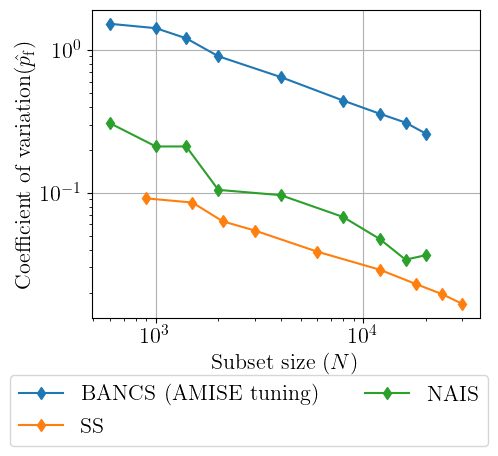

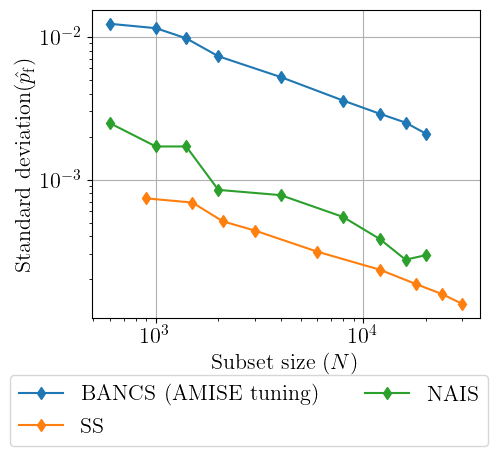

In [9]:
df_beta = pd.read_csv("results/RP38_results_beta.csv")
df_amise = pd.read_csv("results/RP38_results_amise.csv")

draw_mean(df_beta, df_amise, save_file="figures/RP38_mean.pdf");
draw_cov(df_beta, df_amise, save_file="figures/RP38_cov.pdf");
draw_stat(df_beta, df_amise, save_file="figures/RP38_std.pdf");